# Dask delayed

_Delayed evaluation_ is one of the main features of Dask. In general terms, this feature starts with a _promise_ which is a function which will be only calculated when calling a `compute` method

In [1]:
from dask import delayed

After importing the library, the `@delayed` decorator is used over a function to build a dependecy graph if the function components

In [2]:
@delayed
def add(a, b):
    result = a + b
    print(f"{a} + {b} = {result}")
    return a + b

When calling a delayed function, it is not actually executed yet. Instead, it is stored as a _promise_ which can be computed later. By convention, _promises_ are indicated by th suffix `_p` and become an object of type `dask.delayed.Delayed`

In [12]:
x_p = add(1, 2)
type(x_p)

dask.delayed.Delayed

The return value of a `delayed` object is a reference 

In [13]:
x_p

Delayed('add-26398bbc-433c-4ed7-ad1c-8b0b58912355')

And only when `compute` is called, the actual return values of the functino call are obtained

In [5]:
x_p.compute()

1 + 2 = 3


3

Multiple _delayed_ functions can then be used to build a workflow which can also be visualized

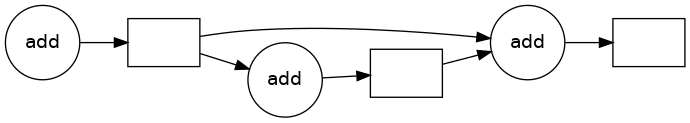

In [7]:
x_p = add(1, 2)
y_p = add(x_p, 3)
z_p = add(x_p, y_p)
z_p.visualize(rankdir="LR")

`z_p` is now a list of promises

In [19]:
z_p

Delayed('add-0877eb89-3239-4949-8e00-e778b97aa47d')

And the list of promises are now able to be computed

In [9]:
z_p.compute()

1 + 2 = 3
3 + 3 = 6
3 + 6 = 9
1 + 2 = 3
7 + 7 = 14
4 + 4 = 8
5 + 5 = 10
6 + 6 = 12


9

Instead of a list of promises, a promise of a list can also be created in order to gather the results of multiple promises

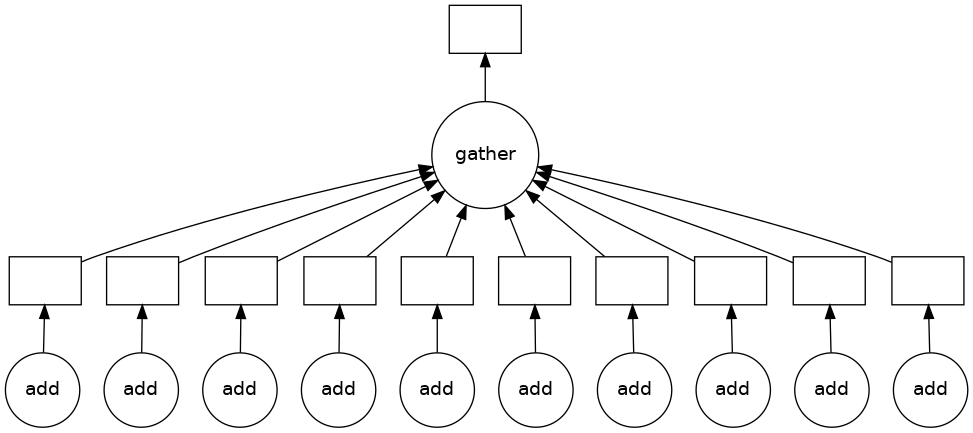

In [20]:
@delayed
def gather(*args):
    return list(args)

g_p = gather(*(add(n, n) for n in range(10))) # Shorthand for gather(add(1, 1), add(2, 2), ...)
g_p.visualize()

In [21]:
g_p.compute()   

8 + 8 = 16
3 + 3 = 6
9 + 9 = 18
2 + 2 = 4
0 + 0 = 0
1 + 1 = 2


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]